In [7]:
from typing import Tuple, Dict, Callable, Iterator, Union, Optional, List
import os
import copy

import numpy as np
import matplotlib.pyplot as plt
import scipy

import torch
from torch import Tensor
import gpytorch
import botorch

In [8]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'neurips_paper':
        width_pt = 397.48499
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [21]:
set_size('neurips_paper', fraction=0.5, subplots=(2,1))

(2.749999930814999, 3.399186852607058)

In [9]:
delta_n = lambda n: ((1/6)*n)**(1/2) * (1/3*(1+2*(1-3/(5*n))**(1/2)))**(1/2)

In [10]:
delta_n_lower_bound = lambda n: 1/3 * n**(1/2)

In [11]:
get_lengthscales = lambda n, factor: delta_n(n)*factor

In [12]:
factor_hennig = 0.1/delta_n(2)

In [13]:
plt.style.use('seaborn-whitegrid')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

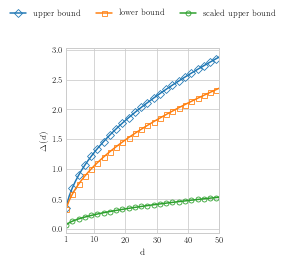

In [14]:
fig, axs = plt.subplots(1,1, figsize=set_size('neurips_paper', fraction=1))
max_dim = 50
n = np.linspace(1,max_dim,max_dim)
plt.plot(n, delta_n(n), label='upper bound', marker='D', markersize=5, markeredgewidth=.8, markevery=2, fillstyle='none')  
plt.plot(n, delta_n_lower_bound(n), label='lower bound', marker='s', markersize=5, markeredgewidth=.8, markevery=2, fillstyle='none')  
plt.plot(n, get_lengthscales(n, factor_hennig), label='scaled upper bound', marker='o', markersize=5, markeredgewidth=.8, markevery=2, fillstyle='none')  
plt.xlabel('d')
xs = np.arange(0, max_dim+1)[::10]
xs[0] = 1
plt.xticks(xs)
plt.xlim([1, max_dim])
plt.ylabel(r'$\Delta(d)$')
lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, frameon=False)
plt.savefig('/home/sarah/Downloads/delta_d.pdf', bbox_inches='tight', bbox_extra_artists=[lgd])

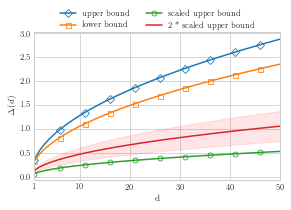

In [9]:
max_dim = 50
factor_lengthscale = 2
gamma = 0.3
fig, axs = plt.subplots(1,1, figsize=set_size('neurips_paper', fraction=.8))
n = np.linspace(1,max_dim,max_dim)
l = get_lengthscales(n, factor_hennig)
plt.plot(n, delta_n(n), label='upper bound', marker='D', markersize=5, markeredgewidth=.8, markevery=5, fillstyle='none')  
plt.plot(n, delta_n_lower_bound(n), label='lower bound', marker='s', markersize=5, markeredgewidth=.8, markevery=5, fillstyle='none')  
plt.plot(n, get_lengthscales(n, factor_hennig), label='scaled upper bound', marker='o', markersize=5, markeredgewidth=.8, markevery=5, fillstyle='none')  
plt.plot(n, factor_lengthscale*l, label=f'{factor_lengthscale} * scaled upper bound')
plt.fill_between(n, factor_lengthscale*l*(1-gamma), factor_lengthscale*l*(1+gamma), 
                 alpha=0.1, color='red')
plt.xlabel('d')
xs = np.arange(0, max_dim+1)[::10]
plt.xlim([1, max_dim])
xs[0] = 1
plt.xticks(xs)
plt.ylabel(r'$\Delta(d)$')
lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=False)
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, frameon=False)
plt.savefig('/home/sarah/Downloads/delta_d_sample_bounds.pdf', bbox_inches='tight', bbox_extra_artists=[lgd])

In [10]:
n = np.linspace(1,40,40)
n

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

In [11]:
factor_lengthscale

2

In [16]:
ls = get_lengthscales(n, factor_hennig)*0.1

In [18]:
ls[:36].mean()

0.03031167723355445